In [15]:

# ================== IMPORT LIBRARIES ==================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier





In [3]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
# ================== DATA INFO ==================
info = [
    "age",
    "1: male, 0: female",
    "chest pain type (0–3)",
    "resting blood pressure",
    "serum cholesterol in mg/dl",
    "fasting blood sugar > 120 mg/dl",
    "resting electrocardiographic results (0–2)",
    "maximum heart rate achieved",
    "exercise induced angina",
    "oldpeak = ST depression induced by exercise relative to rest",
    "slope of the peak exercise ST segment",
    "number of major vessels (0–3) colored by fluoroscopy",
    "thal: 0–3 (defect type)"
]

for i, col in enumerate(heart.columns[:-1]):
    print(f"{col}: \t {info[i]}")

age: 	 age
sex: 	 1: male, 0: female
cp: 	 chest pain type (0–3)
trestbps: 	 resting blood pressure
chol: 	 serum cholesterol in mg/dl
fbs: 	 fasting blood sugar > 120 mg/dl
restecg: 	 resting electrocardiographic results (0–2)
thalach: 	 maximum heart rate achieved
exang: 	 exercise induced angina
oldpeak: 	 oldpeak = ST depression induced by exercise relative to rest
slope: 	 slope of the peak exercise ST segment
ca: 	 number of major vessels (0–3) colored by fluoroscopy
thal: 	 thal: 0–3 (defect type)


In [5]:
# ================== BASIC CHECKS ==================
print("\nTarget distribution:")
print(heart['target'].value_counts())
print("\nMissing values per column:")
print(heart.isnull().sum())



Target distribution:
target
1    526
0    499
Name: count, dtype: int64

Missing values per column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


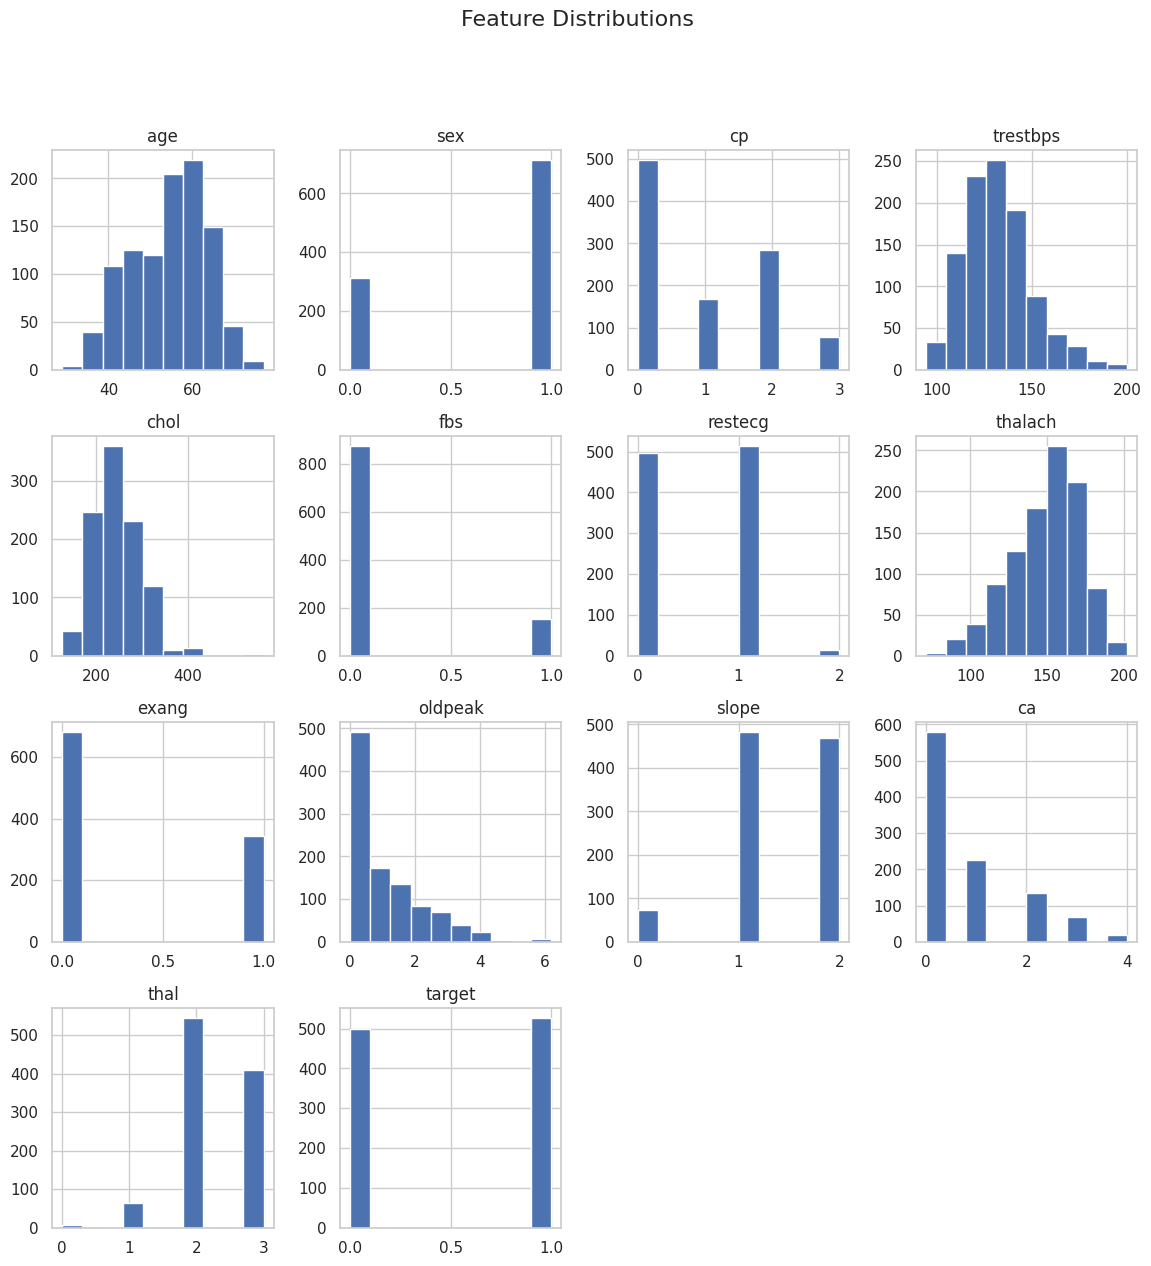

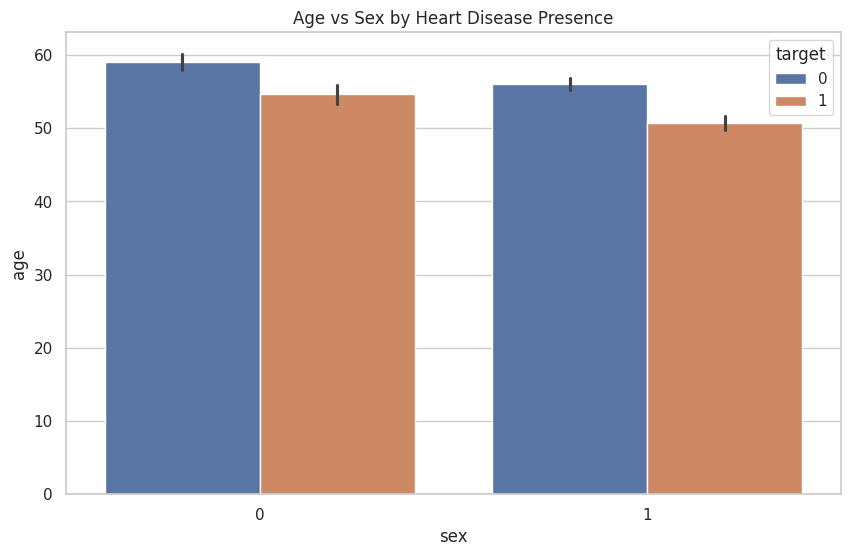

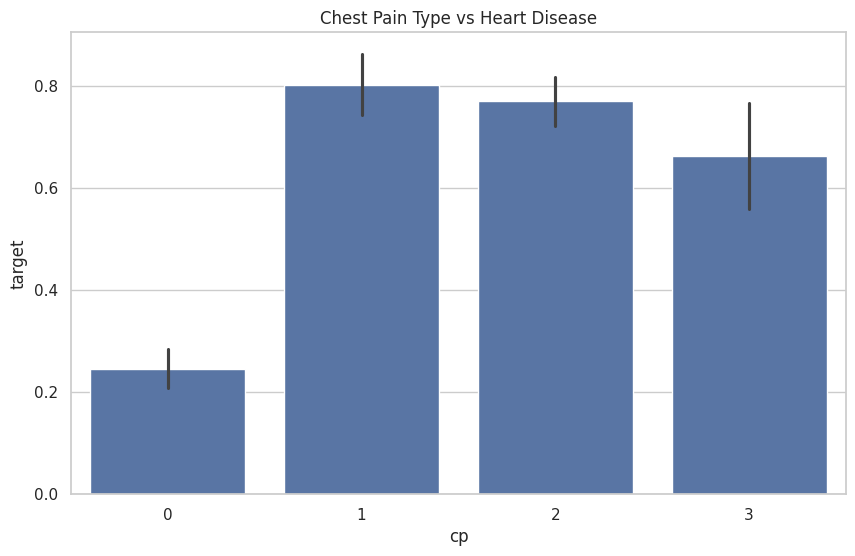

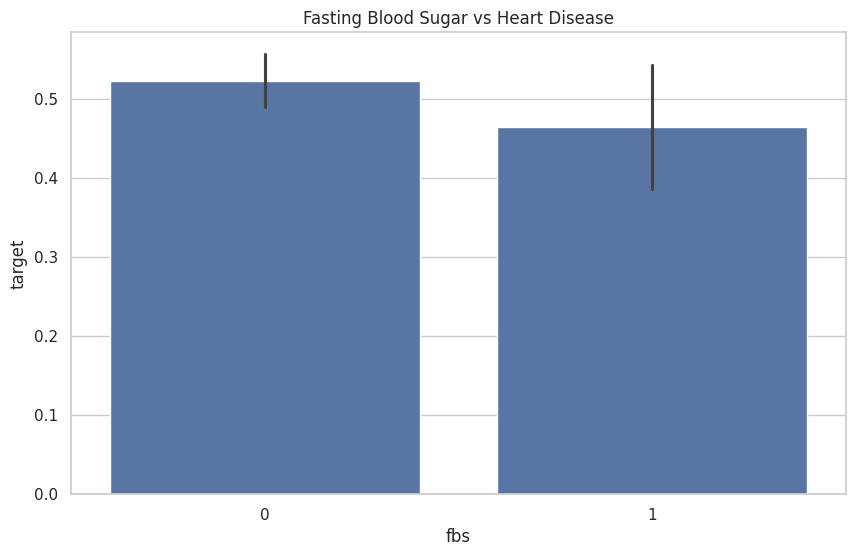

In [7]:
# ================== VISUALIZATIONS ==================
sns.set(style="whitegrid")

# Histogram for all features
heart.hist(figsize=(14, 14))
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# Bar plots for categorical comparisons
sns.barplot(x="sex", y="age", hue="target", data=heart)
plt.title("Age vs Sex by Heart Disease Presence")
plt.show()

sns.barplot(x="cp", y="target", data=heart)
plt.title("Chest Pain Type vs Heart Disease")
plt.show()

sns.barplot(x="fbs", y="target", data=heart)
plt.title("Fasting Blood Sugar vs Heart Disease")
plt.show()

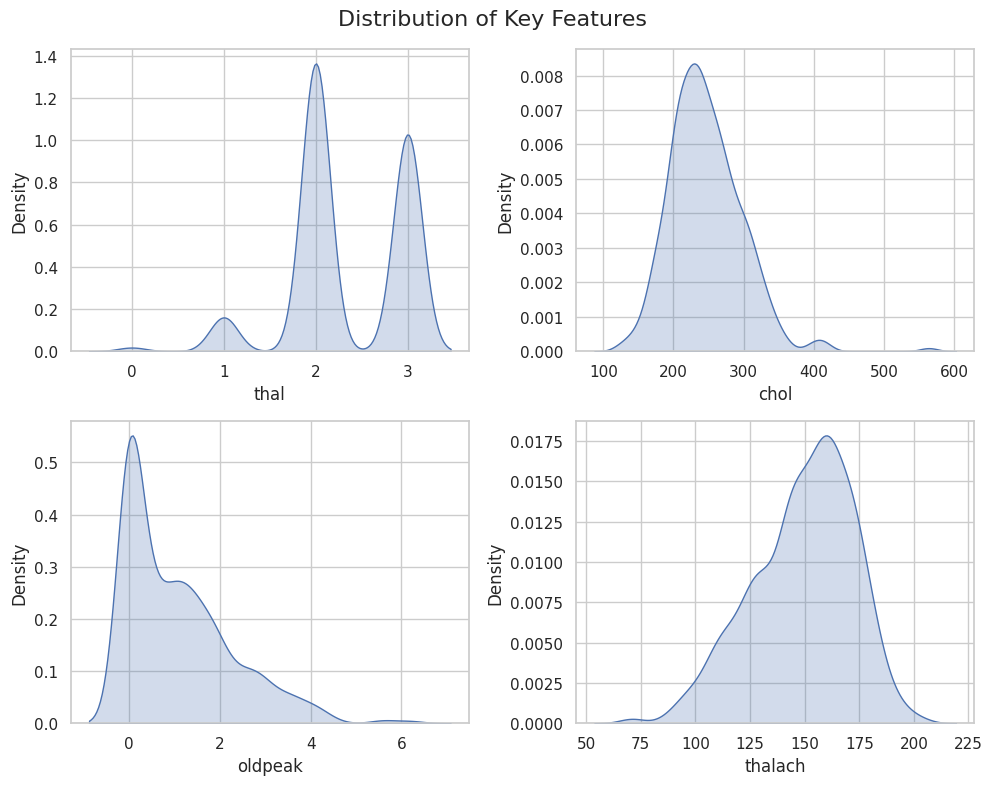

In [8]:

# Distribution plots for key numerical columns
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
sns.kdeplot(heart["thal"], ax=axs[0, 0], shade=True)
sns.kdeplot(heart["chol"], ax=axs[0, 1], shade=True)
sns.kdeplot(heart["oldpeak"], ax=axs[1, 0], shade=True)
sns.kdeplot(heart["thalach"], ax=axs[1, 1], shade=True)
plt.suptitle("Distribution of Key Features", fontsize=16)
plt.tight_layout()
plt.show()

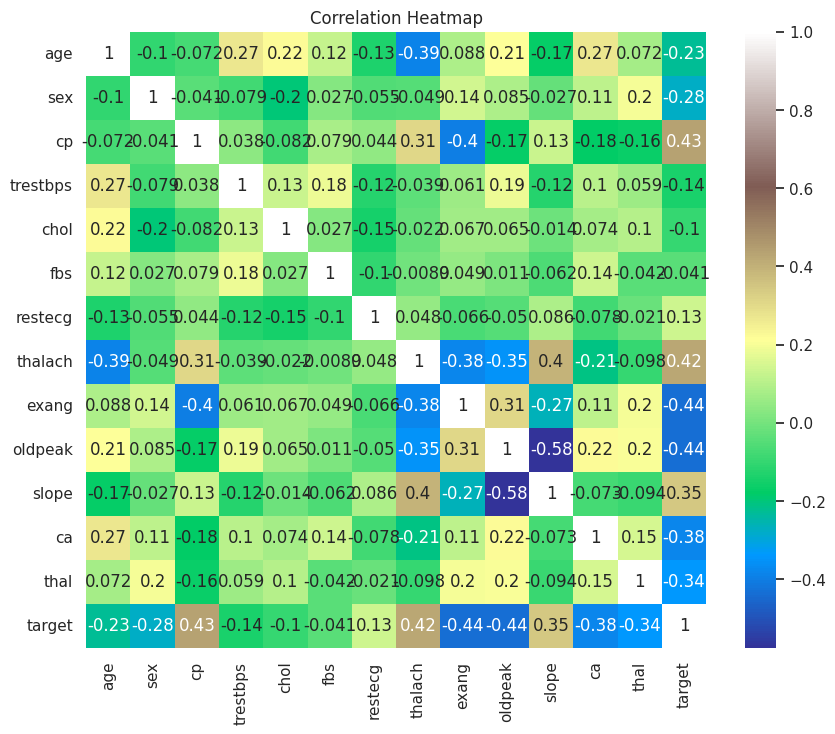

In [9]:

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heart.corr(), annot=True, cmap='terrain')
plt.title("Correlation Heatmap")
plt.show()

In [10]:
# ================== DATA PREPROCESSING ==================
X = heart.drop('target', axis=1)
y = heart['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=10, shuffle=True
)

print("Training set:", X_train.shape)
print("Test set:", X_test.shape)


Training set: (717, 13)
Test set: (308, 13)



Decision Tree Accuracy: 96.43%
Training Accuracy: 1.0
Test Accuracy: 0.9642857142857143

Prediction for input sample:
No - Healthy Heart 


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


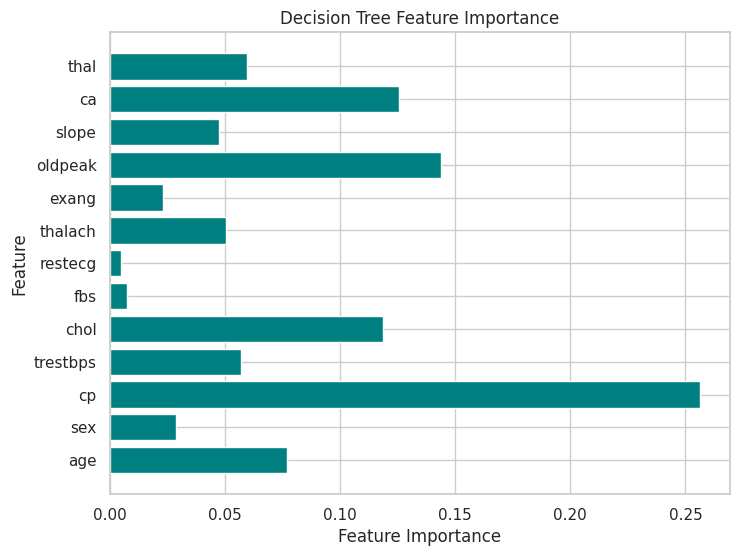

In [11]:
# ================== DECISION TREE ==================
Catagory = [
    "No - Healthy Heart ",
    "Yes - Heart Disease Detected "
]

dt = DecisionTreeClassifier(random_state=10)
dt.fit(X_train, y_train)
prediction_dt = dt.predict(X_test)

accuracy_dt = accuracy_score(y_test, prediction_dt) * 100
print(f"\nDecision Tree Accuracy: {accuracy_dt:.2f}%")
print("Training Accuracy:", dt.score(X_train, y_train))
print("Test Accuracy:", dt.score(X_test, y_test))

# Example prediction
X_DT = np.array([[52, 1, 0, 125, 212, 0, 1, 168, 0, 1.0, 2, 2, 3]])
X_DT_prediction = dt.predict(X_DT)
print("\nPrediction for input sample:")
print(Catagory[int(X_DT_prediction[0])])

# Feature Importance Plot
plt.figure(figsize=(8, 6))
plt.barh(X.columns, dt.feature_importances_, color='teal')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Decision Tree Feature Importance")
plt.show()


In [12]:
# ================== KNN ==================
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_std, y_train)
prediction_knn = knn.predict(X_test_std)
accuracy_knn = accuracy_score(y_test, prediction_knn) * 100

print(f"\nKNN Accuracy: {accuracy_knn:.2f}%")
print("Training Accuracy:", knn.score(X_train_std, y_train))
print("Test Accuracy:", knn.score(X_test_std, y_test))


KNN Accuracy: 87.66%
Training Accuracy: 0.9581589958158996
Test Accuracy: 0.8766233766233766


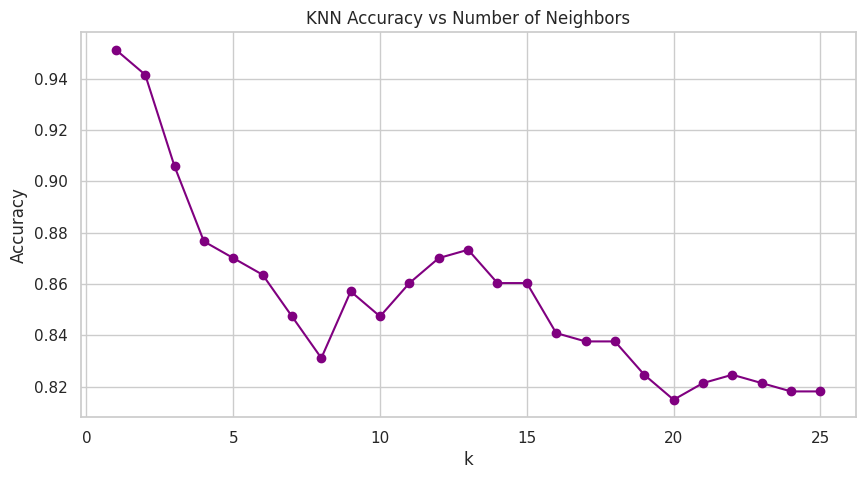

In [13]:
# ================== KNN OPTIMIZATION ==================
k_range = range(1, 26)
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_std, y_train)
    prediction_knn = knn.predict(X_test_std)
    scores_list.append(accuracy_score(y_test, prediction_knn))

plt.figure(figsize=(10, 5))
plt.plot(k_range, scores_list, marker='o', color='purple')
plt.title("KNN Accuracy vs Number of Neighbors")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.show()

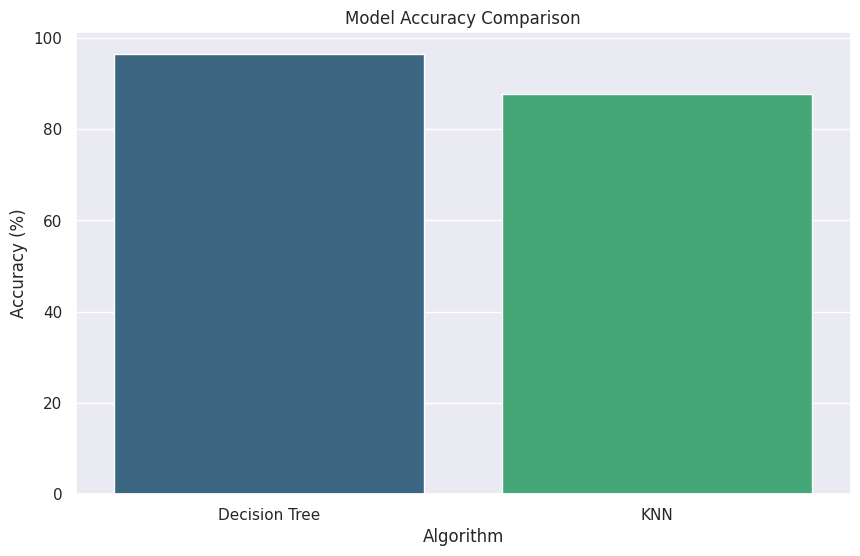

In [14]:
# ================== MODEL COMPARISON ==================
algorithms = ['Decision Tree', 'KNN']
scores = [accuracy_dt, accuracy_knn]

sns.set(rc={'figure.figsize': (10, 6)})
sns.barplot(x=algorithms, y=scores, palette="viridis")
plt.xlabel("Algorithm")
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Comparison")
plt.show()
